In [4]:
import copy_data as cp
import os

import tensorflow as tf


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
layers = tf.keras.layers
models = tf.keras.models
optimizers = tf.keras.optimizers

In [6]:
path = "/notebooks/cats_and_dogs/"

<b>Copy files</b> <br />
Copy all the files in the folder and return the base_dir for processsing

In [10]:
base_dir = cp.CopyImages(path, 1000, 500, 500)
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

Creating Model

In [9]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy", 
        optimizer=optimizers.RMSprop(lr = 1e-4),
        metrics= ['acc']
        )
    
    return model

Adding <b>Generators</b> for processing data

In [11]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
     train_dir, 
     target_size=(150, 150),
     batch_size=20,
     class_mode='binary'
)
validation_generator = train_datagen.flow_from_directory(
     validation_dir, 
     target_size=(150, 150),
     batch_size=20,
     class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
model = get_model()

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

fitting Generators

In [13]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50

)

Epoch 1/30
100/100 [==============================] - 103s 1s/step - loss: 0.6847 - acc: 0.5345 - val_loss: 0.6576 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 102s 1s/step - loss: 0.6481 - acc: 0.6300 - val_loss: 0.7095 - val_acc: 0.5520
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.5995 - acc: 0.6825 - val_loss: 0.6126 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5538 - acc: 0.7075 - val_loss: 0.5936 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 0.5204 - acc: 0.7470 - val_loss: 0.6168 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 102s 1s/step - loss: 0.4938 - acc: 0.7585 - val_loss: 0.5740 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 102s 1s/step - loss: 0.4681 - acc: 0.7750 - val_loss: 0.5865 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 102s 1s/step - 

In [14]:
model.save("cat_and_dogs_small1.h5")

Visualizing History

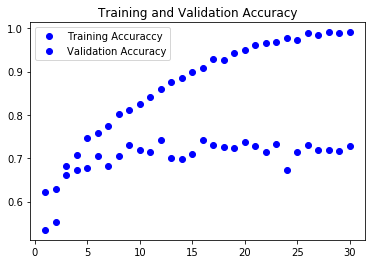

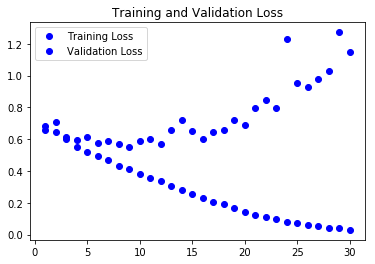

In [20]:
import visualize_data as vd

vd.visualize_data(history)

In [16]:
test_dir = os.path.join(base_dir, "test")
test_generator = train_datagen.flow_from_directory(
     test_dir, 
     target_size=(150, 150),
     batch_size=20,
     class_mode='binary'
)
print(model.evaluate_generator(test_generator))

Found 1000 images belonging to 2 classes.
[1.07493588373065, 0.7140000003576279]


Adding <b>Generators</b> with Data Augmentation

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(150, 150),
     batch_size=20,
     class_mode='binary'
)
validation_generator = train_datagen.flow_from_directory(
     validation_dir, 
     target_size=(150, 150),
     batch_size=20,
     class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = get_model()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50

)

vd.visualize_data(history)

Epoch 1/30
 84/100 [========================>.....] - ETA: 15s - loss: 0.6975 - acc: 0.5048